In [2]:
import matplotlib_inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


# Understanding Data

In [3]:
df=pd.read_excel("D:\\Machine Learning\\files\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Cleaning Data

In [6]:
df.drop_duplicates(inplace = True)
df.shape

(10463, 11)

In [7]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")  

Route --------- 0.009557488292076843 %
Total_Stops --------- 0.009557488292076843 %


In [8]:
df.dropna(inplace = True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [10]:
df['Airline'].value_counts()

Jet Airways          3707
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [9]:
df['Airline']=df['Airline'].replace('Multiple carriers Premium economy','Multiple carriers')
df['Airline']=df['Airline'].replace('Jet Airways Business','Jet Airways')
df['Airline']=df['Airline'].replace('Vistara Premium economy','Vistara')
df['Airline']=df['Airline'].replace('Trujet','Jet Airways')

In [11]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')

In [14]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [19]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%") 

# Handel Outlier

<Axes: >

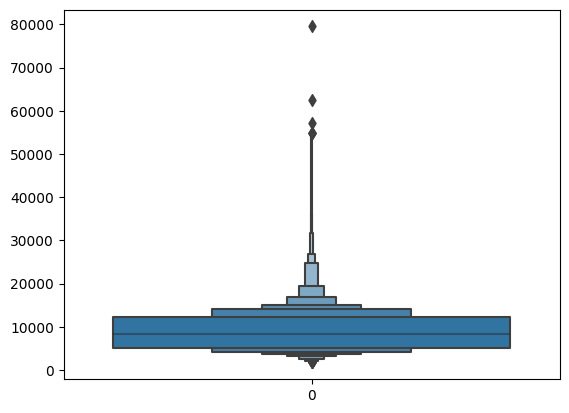

In [15]:
sns.boxenplot(data=df['Price'])

In [16]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)
df = df.drop(df[outlier_mask].index)

# Feature Engineering

In [17]:
df['arrival_hour'] = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[0].astype('int32')
df['arrival_min']  = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[1].astype('int32')

In [18]:
df['Duration_hour' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[0].fillna(0).astype('int32')
df['Duration_min' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[1].fillna(0).astype('int32')

In [19]:
df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month
df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [20]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour 
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [21]:
df.describe()

,Price,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min
count,10368.000000,10368.000000,10368.000000,10368.000000,10368.000000,10368.000000,10368.000000,10368.000000,10368.000000
mean,8832.804205,13.397569,24.722222,10.004726,28.213735,4.716725,13.560185,12.478202,24.320505
std,4069.248472,6.851279,16.597296,8.384882,16.898572,1.157802,8.433824,5.722878,18.776577
min,1759.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,5201.000000,8.000000,10.000000,2.000000,15.000000,4.000000,6.000000,8.000000,5.000000
50%,8099.000000,14.000000,25.000000,8.000000,30.000000,5.000000,12.000000,11.000000,25.000000
75%,12224.000000,19.000000,35.000000,15.000000,45.000000,6.000000,21.000000,18.000000,40.000000
max,23001.000000,23.000000,55.000000,47.000000,55.000000,6.000000,27.000000,23.000000,55.000000


In [25]:
df.describe(include=object)

,Airline,Source,Destination,Total_Stops
count,10368,10368,10368,10368
unique,8,5,5,5
top,Jet Airways,Delhi,Cochin,1 stop
freq,3639,4329,4329,5550


In [23]:
df_1=pd.DataFrame(df['Route'])

# Drop Useless Columns

In [24]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','Route'],inplace=True)

# Feature Engineering for Route

In [26]:
df_1['Stops_places'] = ''

# Loop over each route in the DataFrame
for i, route in enumerate(df_1['Route']):

    # Split the route string by "→" to get a list of the airports in the route
    airports = route.split(' → ')

    # If the list has only one airport, set the "Stops" value to "No Stop"
    if len(airports) == 2:
        df_1.at[i, 'Stops_places'] = 'No Stop'

    # If the list has more than one airport, join all the airports except the first and last with "→"
    else:
        intermediate_Stops_places = ' → '.join(airports[1:-1])
        df_1.at[i, 'Stops_places'] = intermediate_Stops_places
        #df.at[i, 'Stops_places'] = intermediate_Stops_places.replace('→', ',')

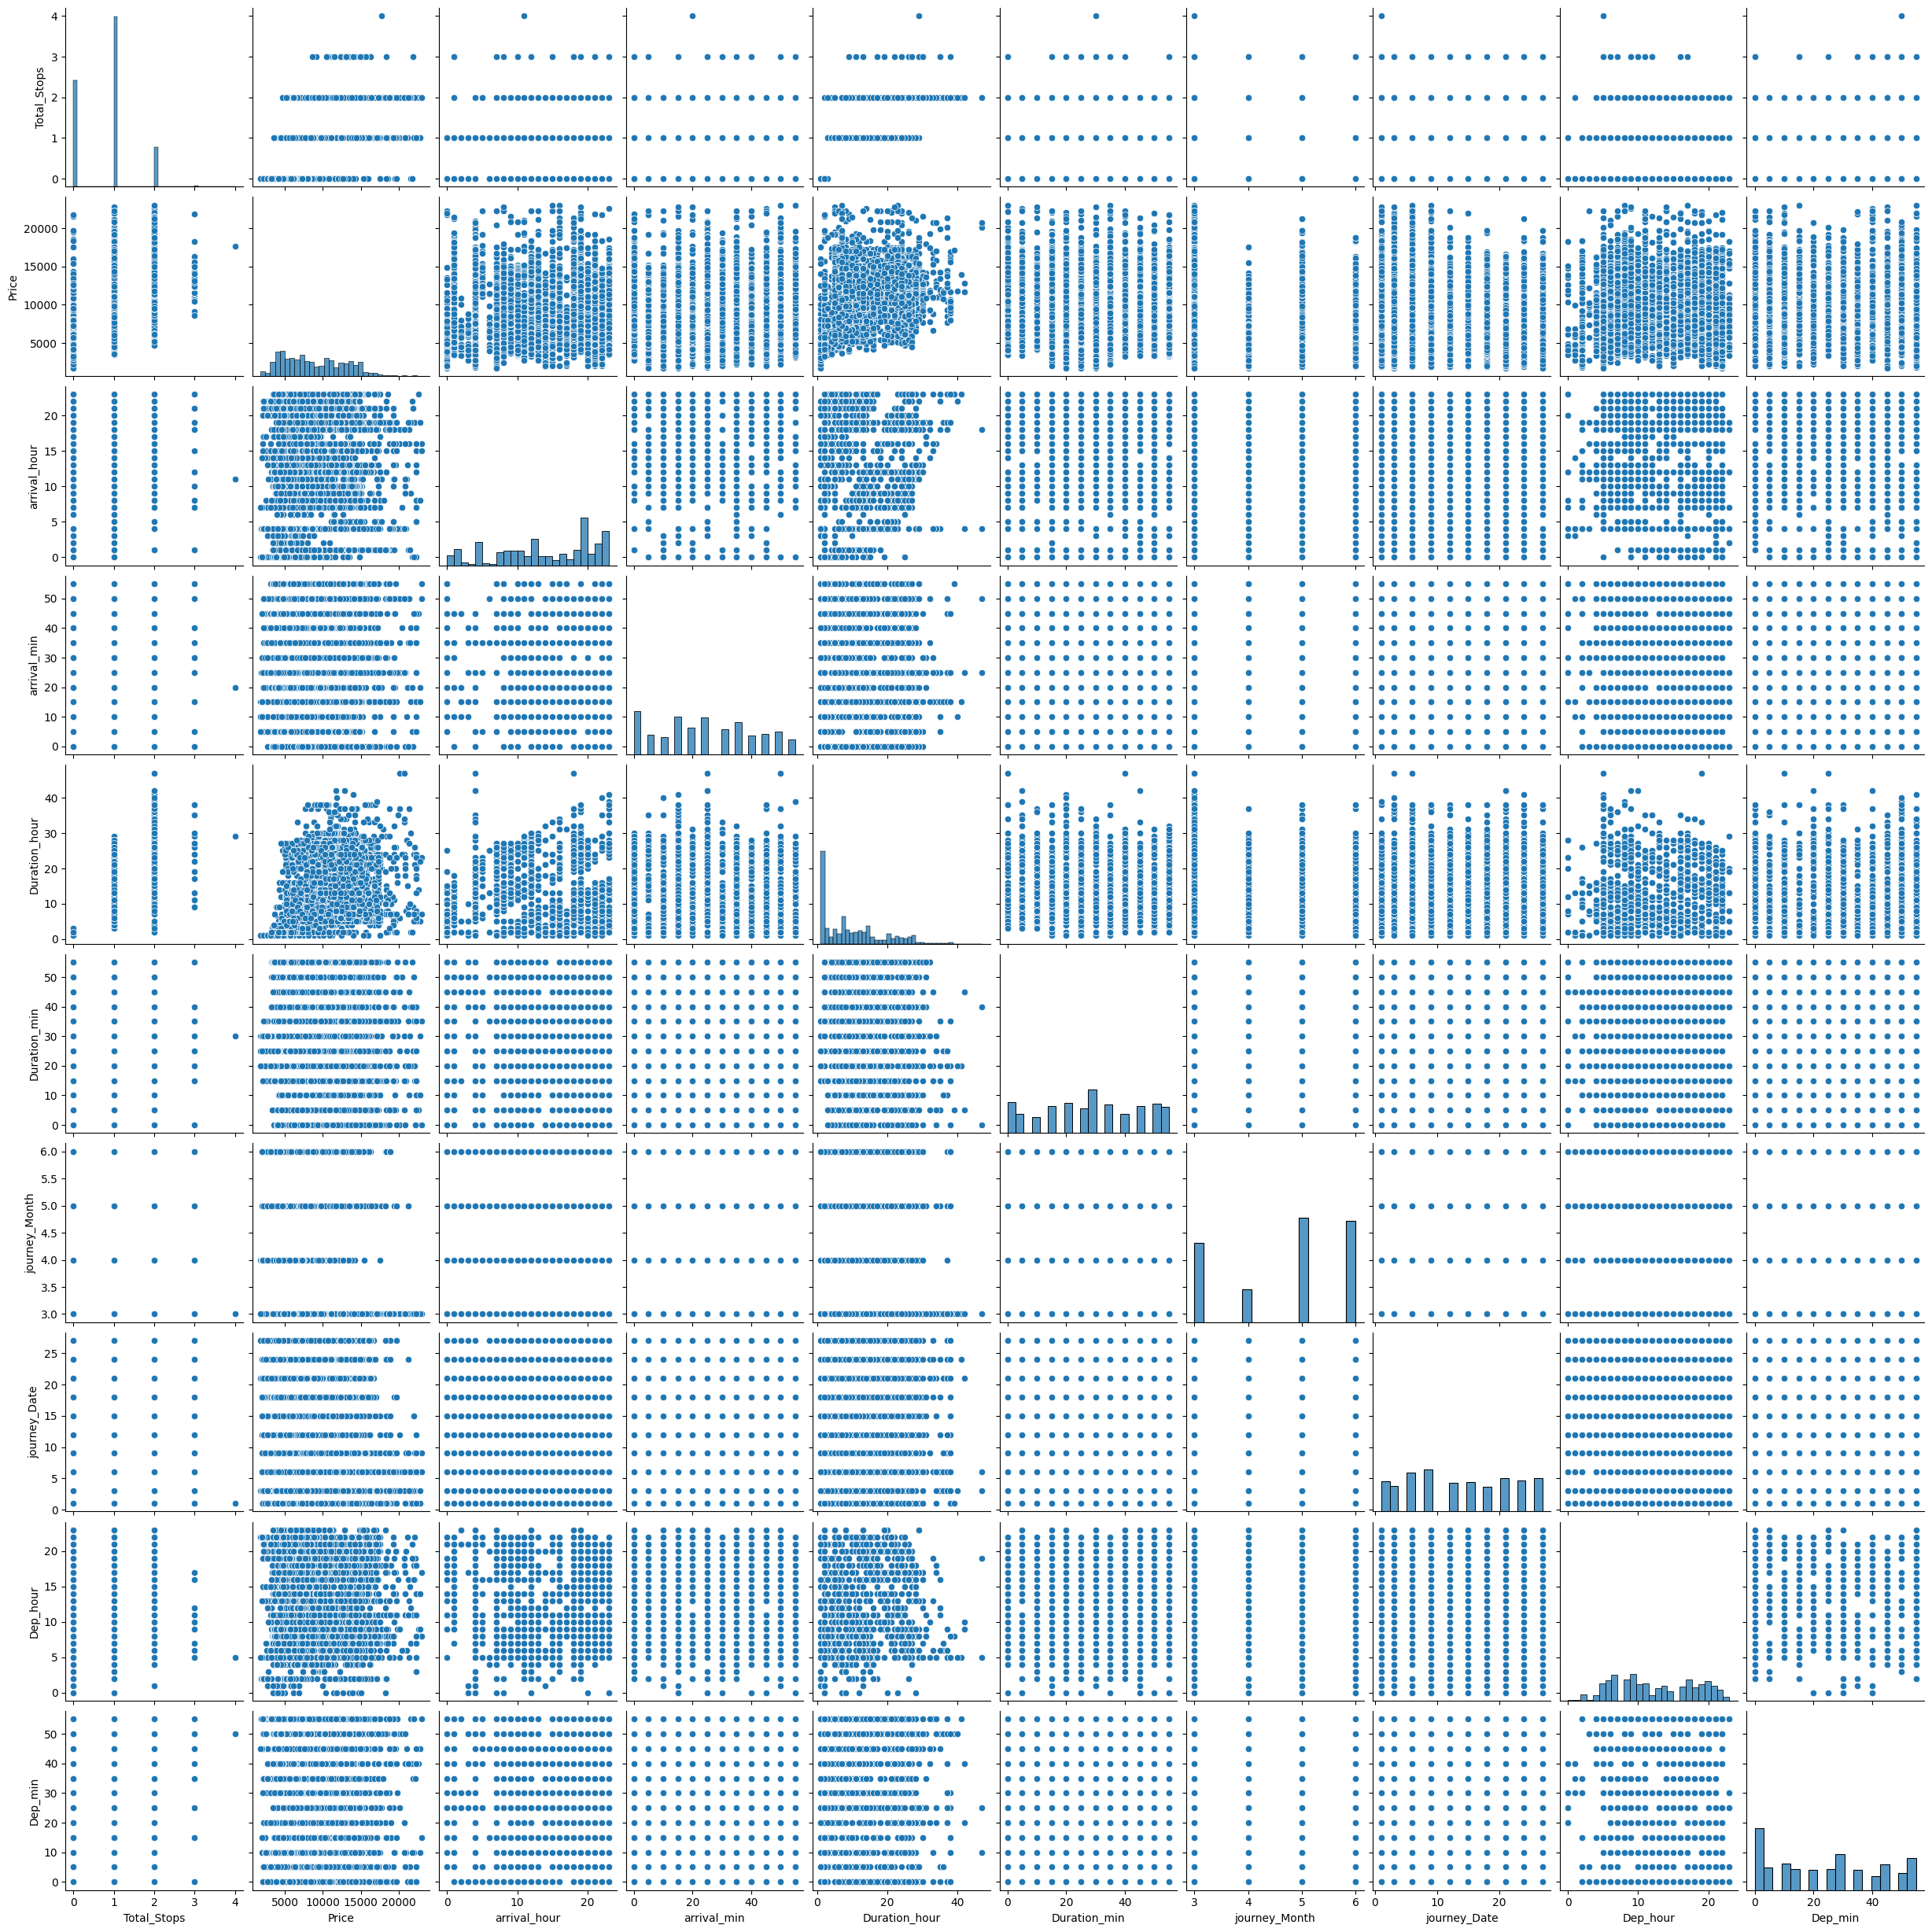

In [50]:
sns.pairplot(df)

# Exploratory Data Analysis

<Axes: xlabel='Total_Stops', ylabel='count'>

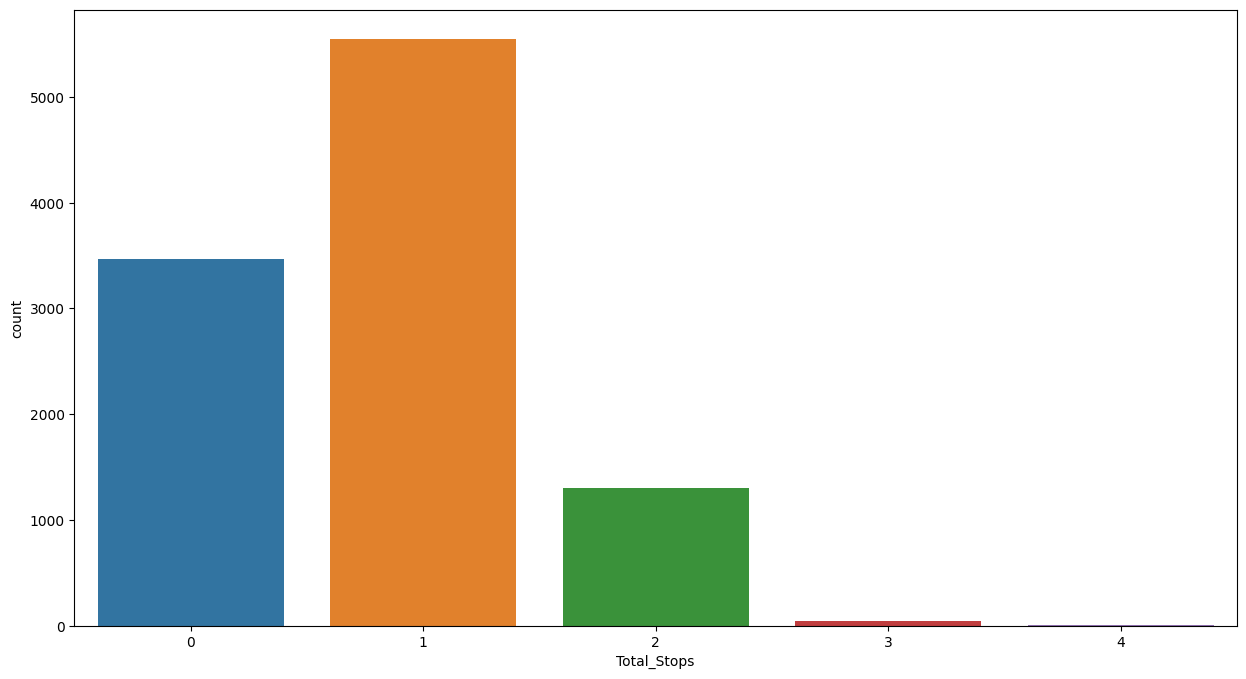

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Total_Stops'])

<Axes: xlabel='Airline', ylabel='count'>

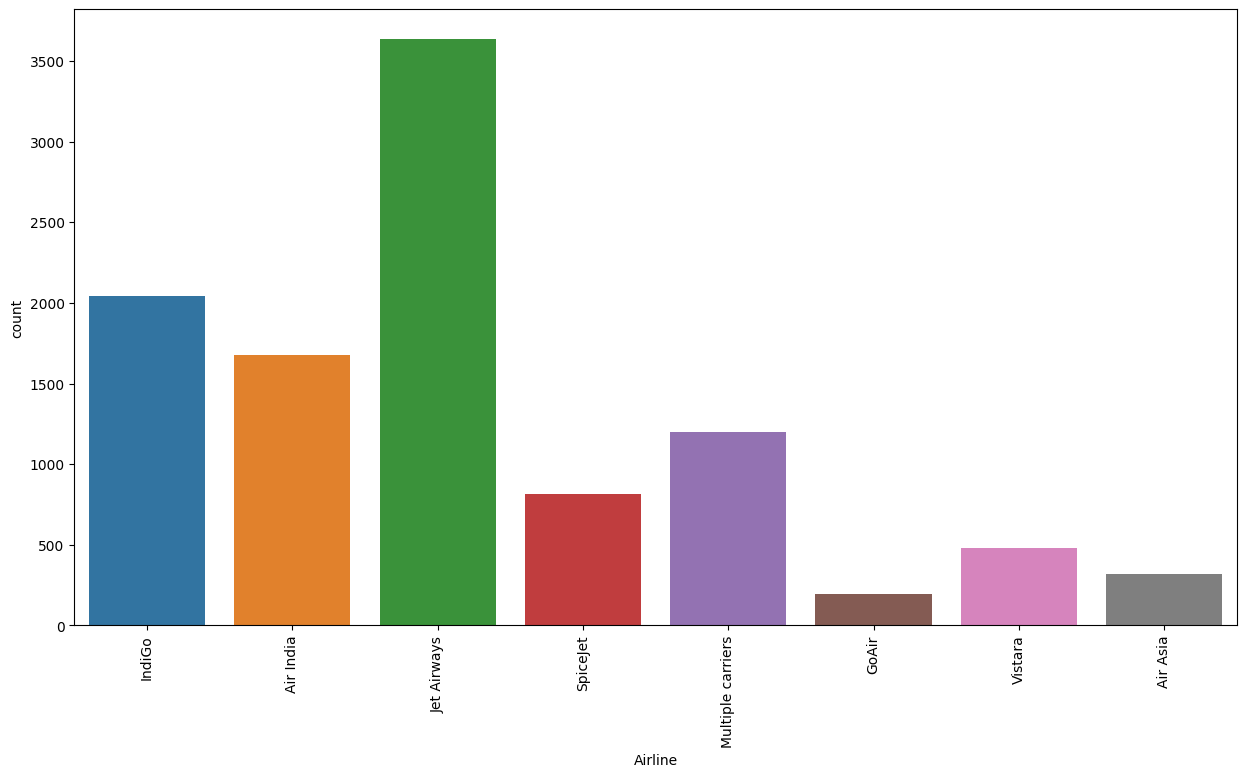

In [45]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.countplot(x=df['Airline'])


# What is  The most Cities transit ? 

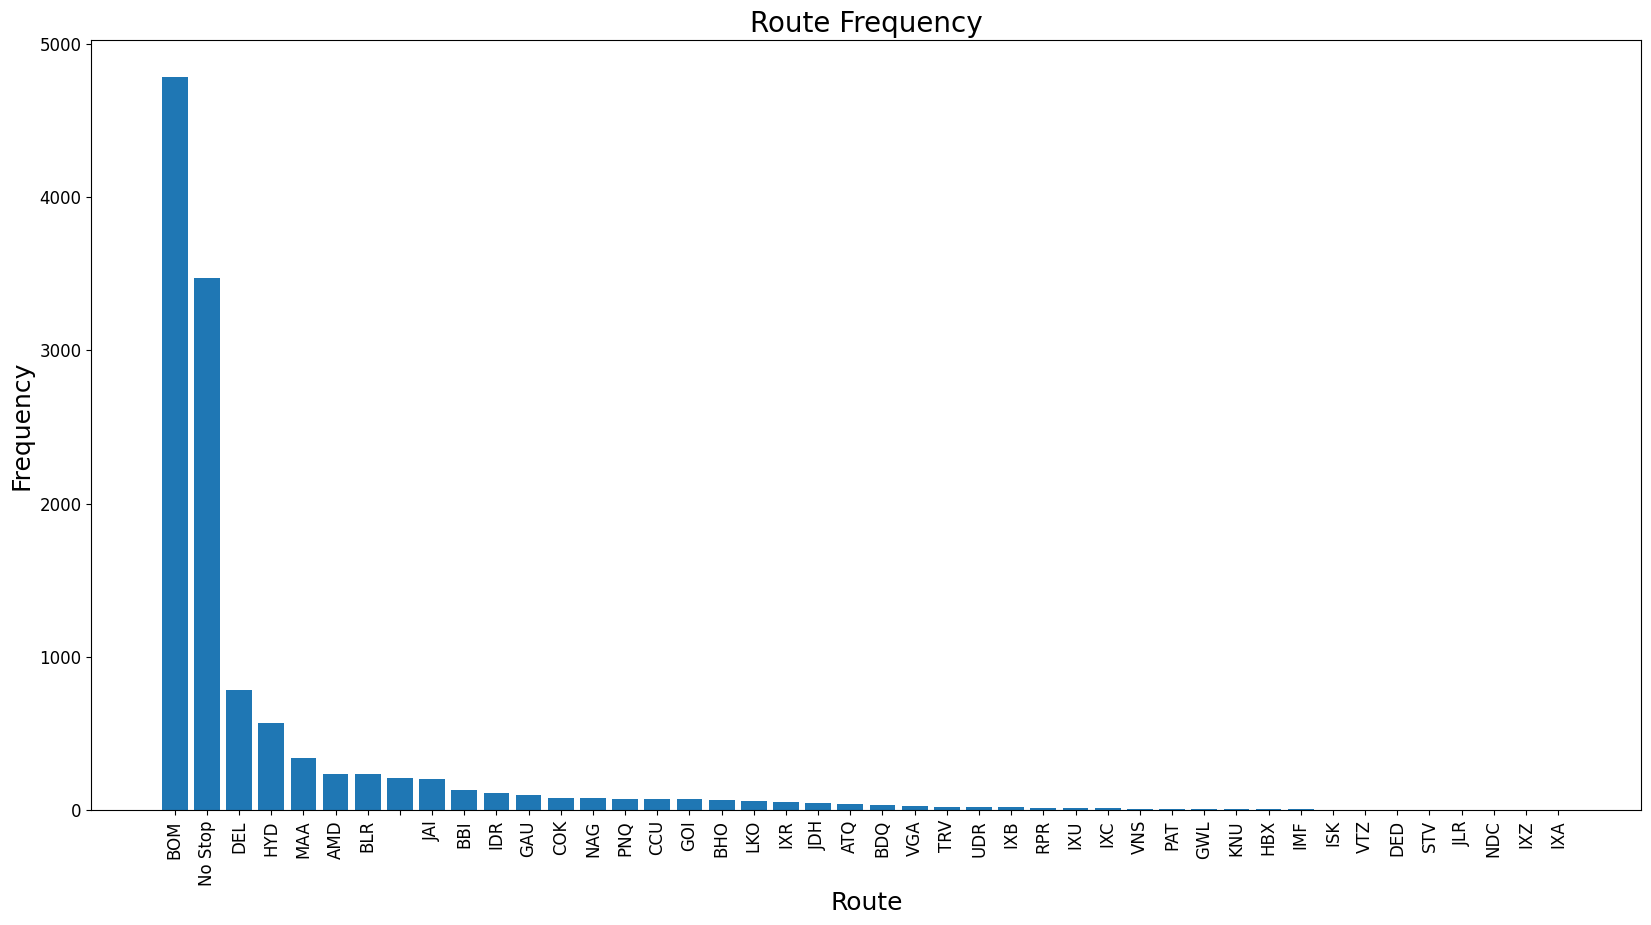

In [34]:
Route_counts = df_1['Stops_places'].str.split(' → ').explode().value_counts()

# create a bar chart of the cuisine frequency
plt.figure(figsize=(20,10))
plt.bar(Route_counts.index, Route_counts.values)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Route', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Route Frequency', fontsize=20)
plt.show()

# What is the most days has journey

<Axes: xlabel='journey_Date', ylabel='count'>

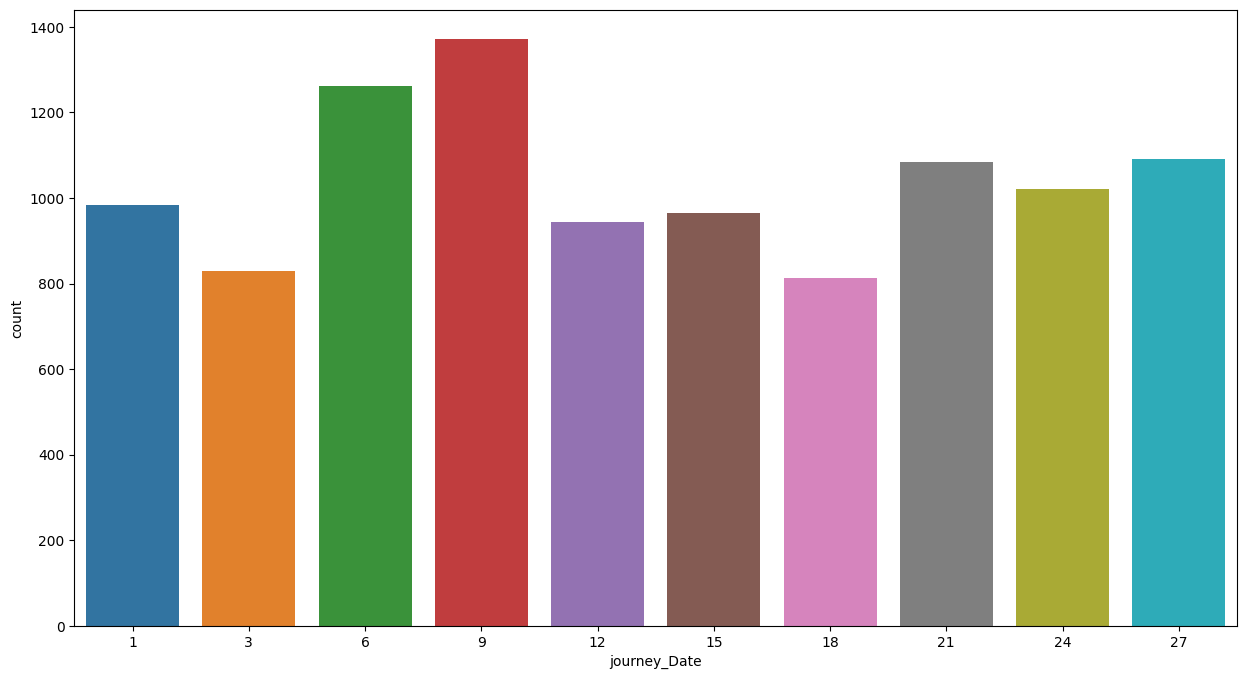

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['journey_Date'])

# What is the most month has journies ?

<Axes: xlabel='journey_Month', ylabel='count'>

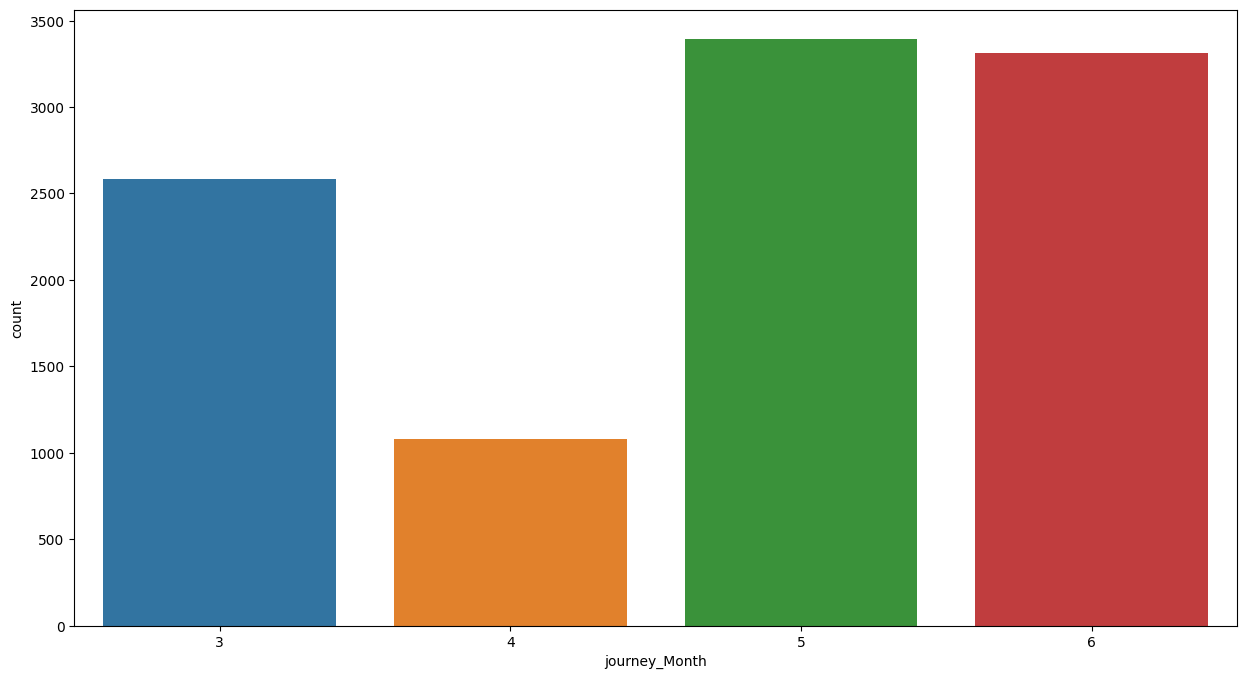

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['journey_Month'])

<Axes: xlabel='Dep_hour', ylabel='count'>

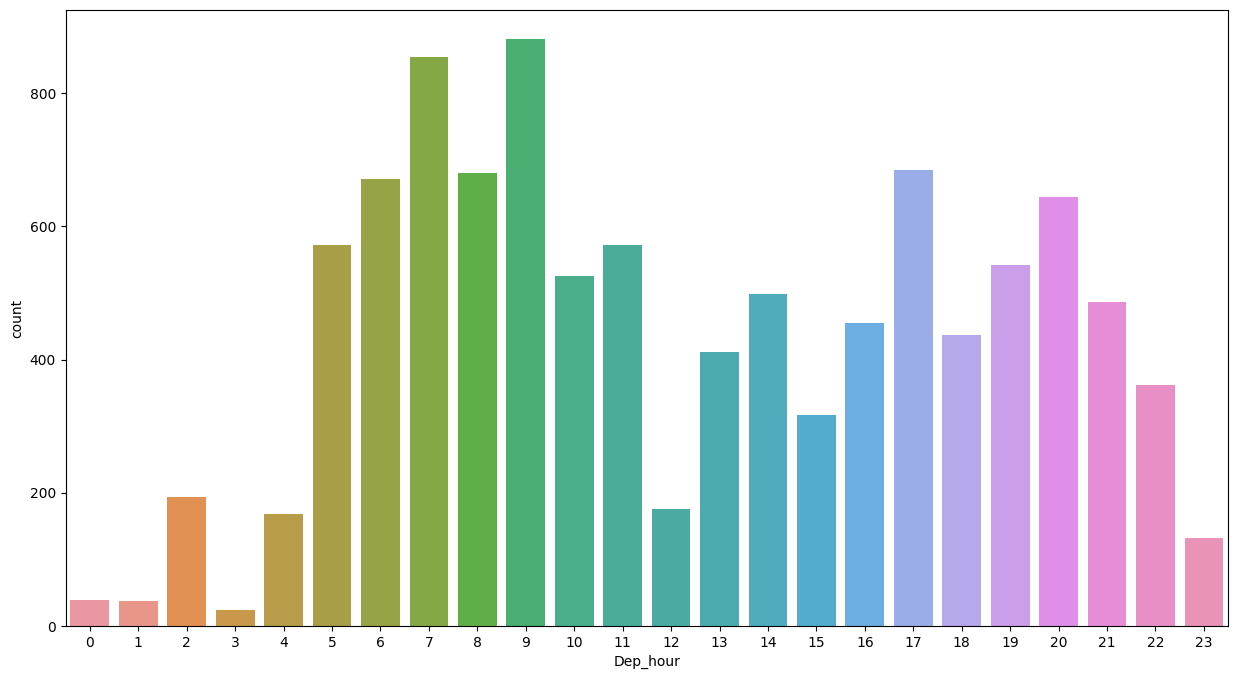

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Dep_hour'])


<Axes: xlabel='Dep_min', ylabel='count'>

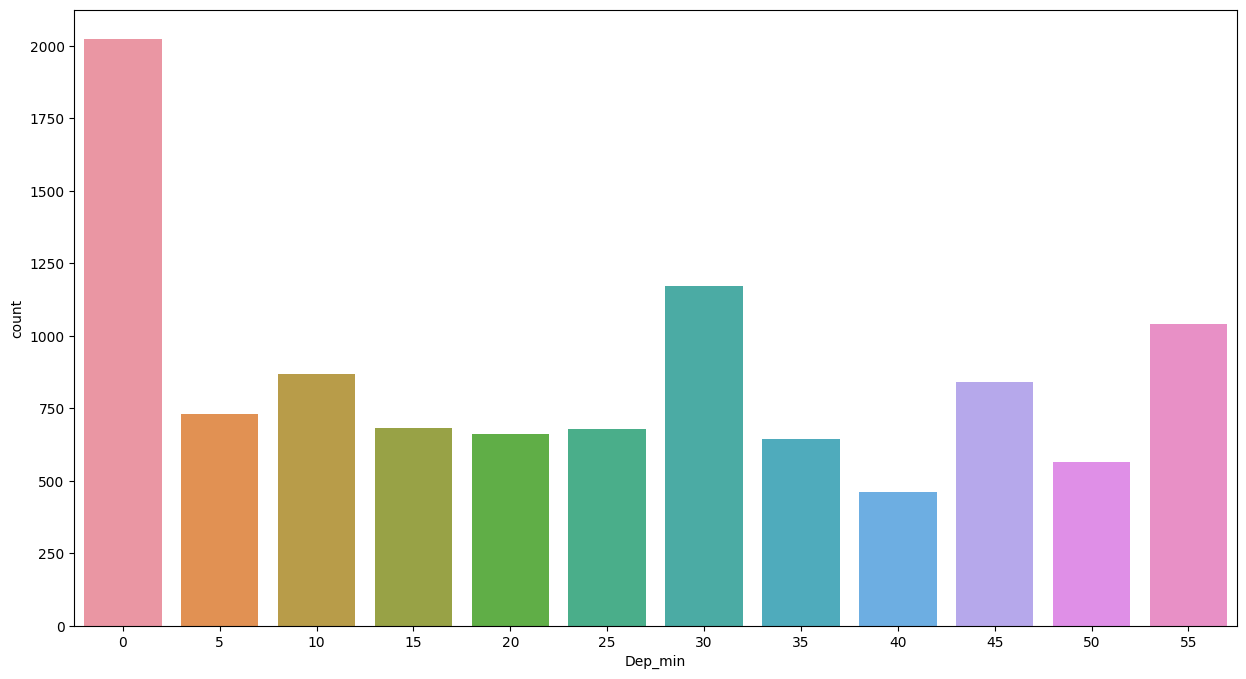

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Dep_min'])


# There postive Corrlation between Duration hour and Price

<Axes: xlabel='Duration_hour', ylabel='Price'>

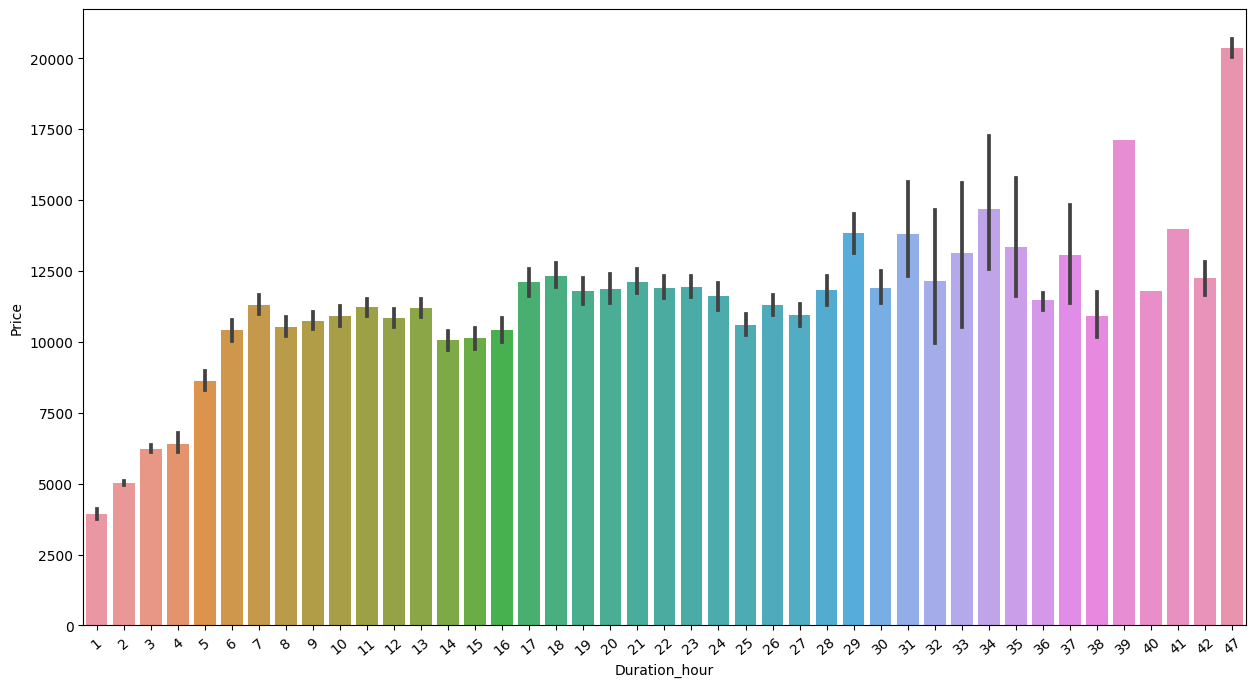

In [40]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=40)
sns.barplot(x=df['Duration_hour'],y=df['Price'])

# What month is highist and lowist price ? 

<Axes: xlabel='journey_Month', ylabel='Price'>

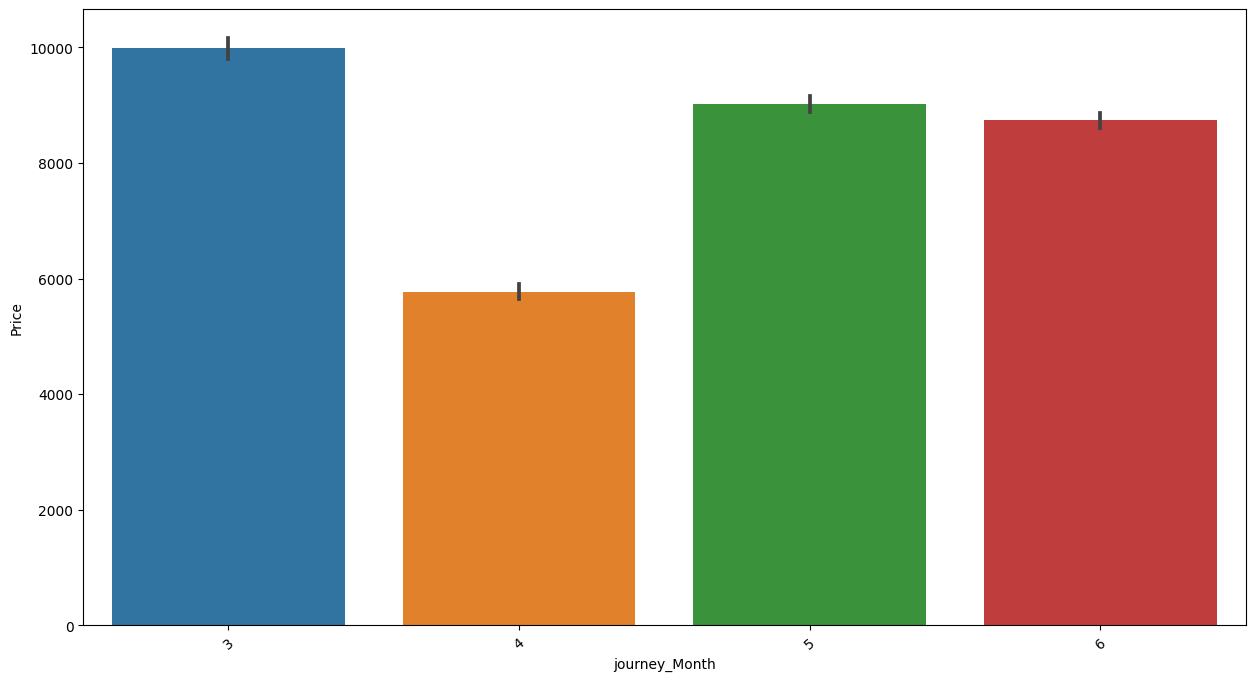

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=40)
sns.barplot(x=df['journey_Month'],y=df['Price'])

# There a corrlation between Total stops and Price 

<Axes: xlabel='Total_Stops', ylabel='Price'>

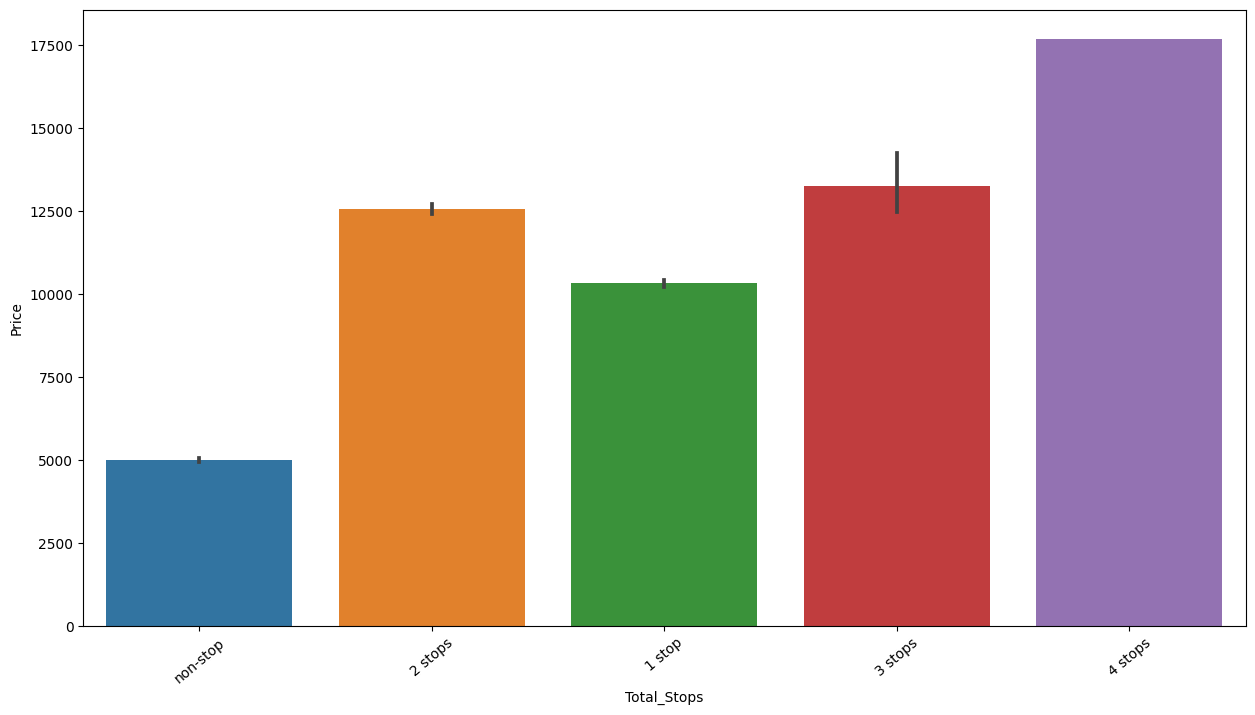

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=40)
sns.barplot(x=df['Total_Stops'],y=df['Price'])

# what is the most arival hour in price ?

<Axes: xlabel='arrival_hour', ylabel='Price'>

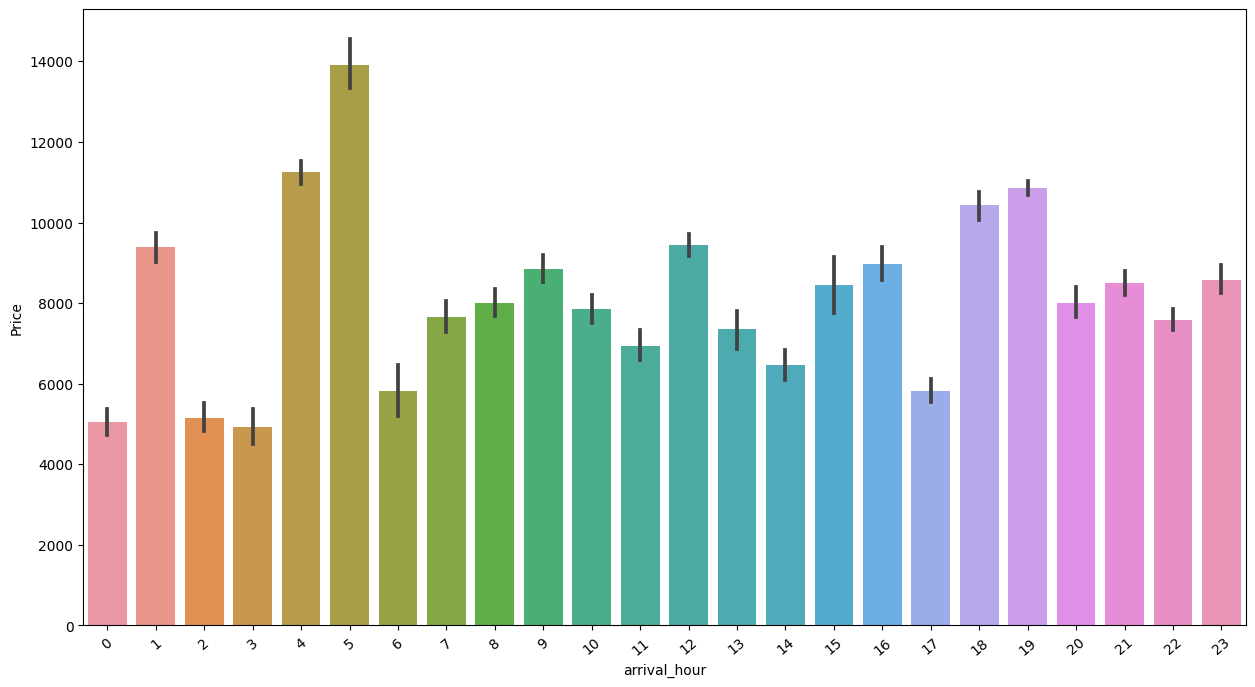

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=40)
sns.barplot(x=df['arrival_hour'],y=df['Price'])

<Axes: xlabel='Dep_hour', ylabel='Price'>

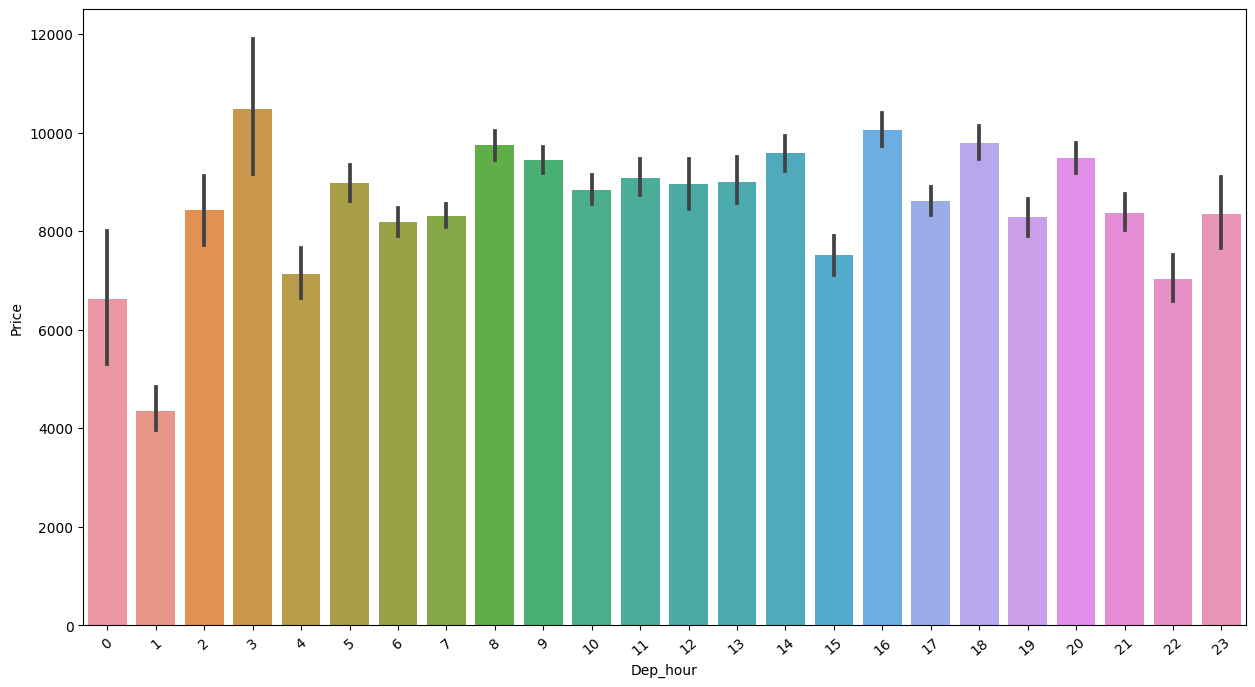

In [30]:

plt.figure(figsize=(15,8))
plt.xticks(rotation=40)
sns.barplot(x=df['Dep_hour'],y=df['Price'])

# preproccing

## Split into X and y

In [35]:
X = df.drop('Price',axis = 1)
y = df['Price']

## Encodeing 


### Lable encoding for Total stops 

In [36]:
df

,Airline,Source,Destination,Total_Stops,Price,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,non-stop,3897,1,10,2,50,3,24,22,20
1,Air India,Kolkata,Banglore,2 stops,7662,13,15,7,25,5,1,5,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,4,25,19,0,6,9,9,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,23,30,5,25,5,12,18,5
4,IndiGo,Banglore,Delhi,1 stop,13302,21,35,4,45,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,22,25,2,30,4,9,19,55
10679,Air India,Kolkata,Banglore,non-stop,4145,23,20,2,35,4,27,20,45
10680,Jet Airways,Banglore,Delhi,non-stop,7229,11,20,3,0,4,27,8,20
10681,Vistara,Banglore,Delhi,non-stop,12648,14,10,2,40,3,1,11,30


In [37]:
encoded = {'non-stop':0,
            '1 stop' :1,
           '2 stops' :2 ,
           '3 stops' :3 ,
           '4 stops' :4 }
df['Total_Stops']=df['Total_Stops'].map(encoded)

In [38]:
X = pd.get_dummies(X,drop_first=True)

In [39]:
X

,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,1,10,2,50,3,24,22,20,0,0,...,0,0,0,1,0,0,0,0,0,1
1,13,15,7,25,5,1,5,50,1,0,...,1,0,0,0,0,0,1,0,0,0
2,4,25,19,0,6,9,9,25,0,0,...,0,0,1,0,0,0,1,0,0,0
3,23,30,5,25,5,12,18,5,0,0,...,1,0,0,0,0,0,0,0,0,0
4,21,35,4,45,3,1,16,50,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,22,25,2,30,4,9,19,55,0,0,...,1,0,0,0,0,0,0,0,0,1
10679,23,20,2,35,4,27,20,45,1,0,...,1,0,0,0,0,0,0,0,0,1
10680,11,20,3,0,4,27,8,20,0,0,...,0,0,0,1,0,0,0,0,0,1
10681,14,10,2,40,3,1,11,30,0,0,...,0,0,0,1,0,0,0,0,0,1


# split into train and test 

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# feature selection 

In [60]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(mutual_info_regression,k='all')
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Total_Stops'),
  Text(1, 0, 'arrival_hour'),
  Text(2, 0, 'arrival_min'),
  Text(3, 0, 'Duration_hour'),
  Text(4, 0, 'Duration_min'),
  Text(5, 0, 'journey_Month'),
  Text(6, 0, 'journey_Date'),
  Text(7, 0, 'Dep_hour'),
  Text(8, 0, 'Dep_min'),
  Text(9, 0, 'Airline_Air India'),
  Text(10, 0, 'Airline_GoAir'),
  Text(11, 0, 'Airline_IndiGo'),
  Text(12, 0, 'Airline_Jet Airways'),
  Text(13, 0, 'Airline_Multiple carriers'),
  Text(14, 0, 'Airline_SpiceJet'),
  Text(15, 0, 'Airline_Vistara'),
  Text(16, 0, 'Source_Chennai'),
  Text(17, 0, 'Source_Delhi'),
  Text(18, 0, 'Source_Kolkata'),
  Text(19, 0, 'Source_Mumbai'),
  Text(20, 0, 'Destination_Cochin'),
  Text(21, 0, 'Destination_Delhi'),
  Text(22, 0, 'Destination_Hyderabad'),
  Text(23, 0, 'Destination_Kolkata')])

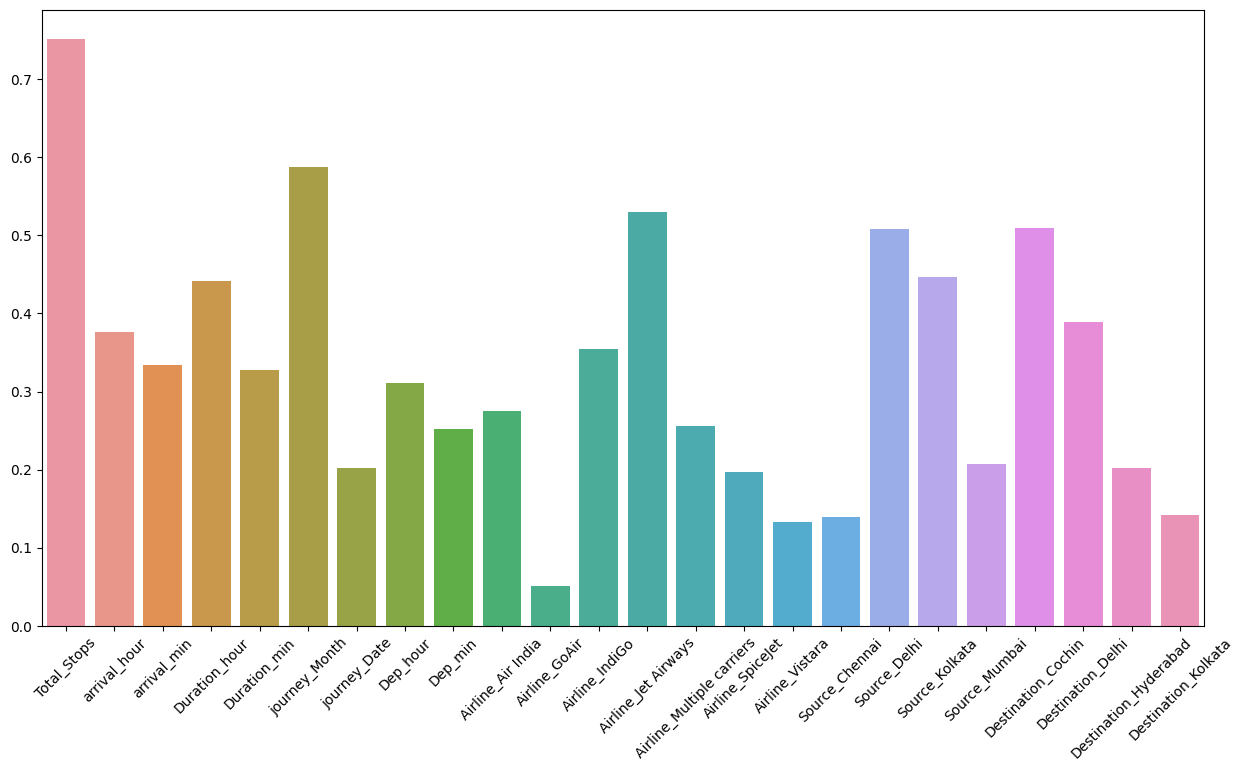

In [61]:
plt.figure(figsize=[15,8])
sns.barplot(x=[i for i in fs.feature_names_in_],y = fs.scores_)
plt.xticks(rotation=45)

In [62]:
fs = SelectKBest(mutual_info_regression,k=15)
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

# feature scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
x_train_scaled

,Total_Stops,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1.823886,0.525587,1.219109,-0.356604,-0.785161,-1.483621,0.525152,-0.431566,0.296784,2.286204,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
1,0.309641,-0.206120,0.617765,-0.596353,0.101929,1.107120,1.592211,-0.953904,-1.033913,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
2,0.309641,0.818270,-1.486937,0.722270,0.989018,0.243539,0.880838,-1.824468,-0.501634,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
3,-1.204604,-0.059779,1.820452,-0.955978,0.989018,1.107120,0.880838,-0.257453,-0.767774,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
4,-1.204604,-0.498803,0.918437,-0.955978,1.580411,-1.483621,0.169466,-0.953904,1.095202,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,0.309641,0.818270,-0.584921,-0.476479,-0.193768,1.107120,1.592211,-0.083341,1.361341,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
8290,0.309641,-0.937827,0.918437,0.482520,0.989018,-1.483621,0.525152,0.613110,1.627480,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
8291,0.309641,-0.059779,-0.584921,1.801143,-0.785161,1.107120,-0.897592,-0.083341,-1.300052,2.286204,...,-0.292092,-0.22243,-0.194057,-0.835166,1.609013,-0.267019,-0.835166,-0.511880,-0.267019,-0.194057
8292,0.309641,-0.206120,0.617765,-0.236729,0.989018,0.243539,1.592211,-1.650355,1.361341,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057


In [65]:
x_train_scaled

,Total_Stops,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1.823886,0.525587,1.219109,-0.356604,-0.785161,-1.483621,0.525152,-0.431566,0.296784,2.286204,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
1,0.309641,-0.206120,0.617765,-0.596353,0.101929,1.107120,1.592211,-0.953904,-1.033913,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
2,0.309641,0.818270,-1.486937,0.722270,0.989018,0.243539,0.880838,-1.824468,-0.501634,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
3,-1.204604,-0.059779,1.820452,-0.955978,0.989018,1.107120,0.880838,-0.257453,-0.767774,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
4,-1.204604,-0.498803,0.918437,-0.955978,1.580411,-1.483621,0.169466,-0.953904,1.095202,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,0.309641,0.818270,-0.584921,-0.476479,-0.193768,1.107120,1.592211,-0.083341,1.361341,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057
8290,0.309641,-0.937827,0.918437,0.482520,0.989018,-1.483621,0.525152,0.613110,1.627480,-0.437406,...,-0.292092,-0.22243,-0.194057,-0.835166,-0.621499,-0.267019,-0.835166,1.953585,-0.267019,-0.194057
8291,0.309641,-0.059779,-0.584921,1.801143,-0.785161,1.107120,-0.897592,-0.083341,-1.300052,2.286204,...,-0.292092,-0.22243,-0.194057,-0.835166,1.609013,-0.267019,-0.835166,-0.511880,-0.267019,-0.194057
8292,0.309641,-0.206120,0.617765,-0.236729,0.989018,0.243539,1.592211,-1.650355,1.361341,-0.437406,...,-0.292092,-0.22243,-0.194057,1.197366,-0.621499,-0.267019,1.197366,-0.511880,-0.267019,-0.194057


# Modeling

### Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print('R2 value',lr.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))

R2 value 0.6248343183530716
mean square error 6160841.537479775


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)
print('R2 value',dt.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))

R2 value 0.7017156715611306
mean square error 4898322.449319619


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Lasso

In [69]:
from sklearn.linear_model import  Lasso , Ridge
ls = Lasso()
ls.fit(x_train_scaled,y_train)
y_pred = ls.predict(x_test_scaled)
print('evaluation on training', ls.score(x_train_scaled,y_train))
print('evaluation on testing', ls.score(x_test_scaled,y_test))

evaluation on training 0.6429125083680609
evaluation on testing 0.6251724179236595


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### KNN regressor 

In [70]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


evaluation on training 0.8486704836354394
evaluation on testing 0.7608107620752689


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### Support Vector Regressor

In [71]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_scaled,y_train)
y_pred = svr.predict(x_test_scaled)
print('evaluation on training', svr.score(x_train_scaled,y_train))
print('evaluation on testing', svr.score(x_test_scaled,y_test))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


evaluation on training 0.07624423975536265


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


evaluation on testing 0.07522670432734002


### XGboost Regressor

In [72]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train_scaled,y_train)
y_pred = xg.predict(x_test_scaled)
print('evaluation on training', xg.score(x_train_scaled,y_train))
print('evaluation on testing', xg.score(x_test_scaled,y_test))

evaluation on training 0.9276419392175409
evaluation on testing 0.8457025581573052


#### Cross Validate For XGboost

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)
score = cross_validate(xg,x_train_scaled,y_train,cv=kfold)

In [74]:
score

{'fit_time': array([0.57980204, 0.47588706, 0.48988628, 0.37288141, 0.53813243,
        0.36557794, 0.48218417, 0.37665296, 0.63039541, 0.38116527]),
 'score_time': array([0.00498652, 0.00698256, 0.00598407, 0.00698328, 0.0039897 ,
        0.00449705, 0.00498605, 0.00498676, 0.00698161, 0.00449347]),
 'test_score': array([0.87314106, 0.84127549, 0.84863539, 0.84807864, 0.85144387,
        0.84820397, 0.84602364, 0.81538646, 0.83929006, 0.84835866])}

#### Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
parm= {'n_estimators':[100,200,300],'max_depth':[5,7,9]}
grid = GridSearchCV(xg,param_grid=parm,cv=10)
grid.fit(x_train_scaled,y_train)


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300]})

In [76]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [77]:
xg= XGBRegressor(max_depth= 5, n_estimators= 100)
xg.fit(x_train_scaled,y_train)
y_pred = xg.predict(x_test_scaled)
print('R2 value',xg.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))
print('evaluation on training', xg.score(x_train_scaled,y_train))
print('evaluation on testing', xg.score(x_test_scaled,y_test))

R2 value 0.8487544914022297
mean square error 2483701.621203515
evaluation on training 0.9065099303283718
evaluation on testing 0.8487544914022297


### Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('R2 value',rf.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


R2 value 0.8070253189973314
mean square error 3168963.7100709574
evaluation on training 0.9502682040785397
evaluation on testing 0.8070253189973314


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### Cross Validate Random Forest Regressor

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)
score = cross_validate(rf,x_train_scaled,y_train,cv=kfold)

In [80]:
score

{'fit_time': array([5.09428859, 5.03911638, 4.09232879, 4.20982671, 3.83432126,
        3.74862814, 4.35082865, 4.79990578, 4.41365123, 4.46837282]),
 'score_time': array([0.0424068 , 0.03754807, 0.03848457, 0.03886724, 0.03886724,
        0.03843427, 0.03153372, 0.04286337, 0.02996492, 0.03769374]),
 'test_score': array([0.84582813, 0.80139049, 0.82785394, 0.81118479, 0.82730115,
        0.81023782, 0.82002031, 0.78394818, 0.80390591, 0.81845158])}

#### Hyper parameter Tuning 

In [81]:
from sklearn.model_selection import GridSearchCV
parm= {'n_estimators':[100,200,300],'max_depth':[5,7,9]}
grid = GridSearchCV(rf,param_grid=parm,cv=10)
grid.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300]})

In [82]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [83]:
rf= RandomForestRegressor(max_depth= 9, n_estimators= 300)
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('R2 value',rf.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


R2 value 0.8303418438035302
mean square error 2786067.7748534693
evaluation on training 0.87162061238378
evaluation on testing 0.8303418438035302


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# pipeLine

In [84]:
X = df.drop('Price',axis=1)
y = df['Price']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:
numeric_column = x_train.select_dtypes(exclude='object').columns

In [87]:
numeric_column

Index(['Total_Stops', 'arrival_hour', 'arrival_min', 'Duration_hour',
       'Duration_min', 'journey_Month', 'journey_Date', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [88]:
cat_column = x_train.select_dtypes(include='object').columns

In [89]:
cat_column

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('impute',SimpleImputer(strategy='median')),
                                ('scaler',StandardScaler(with_mean=False))])

In [91]:
cat_transformer = Pipeline([('impute',SimpleImputer(strategy='most_frequent')),
                            ('encode',OneHotEncoder(sparse=False)),
                            ('scaler',StandardScaler(with_mean=False))])

In [92]:
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_column),
                                             ('cat',cat_transformer,cat_column)])

In [93]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Total_Stops', 'arrival_hour', 'arrival_min', 'Duration_hour',
       'Duration_min', 'journey_Month', 'journey_Date', 'Dep_hour', 'Dep_min'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(sparse=False)),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Airline', 'Source', 'Destination'], dtype='object'))])

In [94]:
pipe = Pipeline([('preprocc',preprocess),
                 ('model',RandomForestRegressor(max_depth= 9, n_estimators= 300))])

In [95]:
pipe.fit(x_train,y_train)

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Total_Stops', 'arrival_hour', 'arrival_min', 'Duration_hour',
       'Duration_min', 'journey_Month', 'journey_Date', 'Dep_hour', 'Dep_min'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Airline', 'Source', 'Destination'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=9, n_estimators=300))])

In [96]:
import joblib 
joblib.dump(pipe,'Model.pkl')
joblib.dump(X.columns,'input.pkl')

['Model.pkl']

In [118]:
df

,Airline,Source,Destination,Total_Stops,Price,arrival_hour,arrival_min,Duration_hour,Duration_min,journey_Month,journey_Date,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,0,3897,1,10,2,50,3,24,22,20
1,Air India,Kolkata,Banglore,2,7662,13,15,7,25,5,1,5,50
2,Jet Airways,Delhi,Cochin,2,13882,4,25,19,0,6,9,9,25
3,IndiGo,Kolkata,Banglore,1,6218,23,30,5,25,5,12,18,5
4,IndiGo,Banglore,Delhi,1,13302,21,35,4,45,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,22,25,2,30,4,9,19,55
10679,Air India,Kolkata,Banglore,0,4145,23,20,2,35,4,27,20,45
10680,Jet Airways,Banglore,Delhi,0,7229,11,20,3,0,4,27,8,20
10681,Vistara,Banglore,Delhi,0,12648,14,10,2,40,3,1,11,30


In [115]:
%%writefile ticket.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

regressor=joblib.load('Model.pkl')
Inputs = joblib.load("Inputs.pkl")


def welcome():
    return "Welcome All"


def predict_Ticket(Airline,	Source,	Destination, Total_Stops ,arrival_hour,	arrival_min	,Duration_hour,	Duration_min ,journey_Month ,journey_Date ,Dep_hour , Dep_min):
  prediction=regressor.predict(pd.DataFrame({'Airline':[Airline],'Source':[Source]	,'Destination':[Destination],	'Total_Stops':[Total_Stops],	'arrival_hour':[arrival_hour],'arrival_min':[arrival_min],'Duration_hour':[Duration_hour],	
  'Duration_min':[Duration_min],	'journey_Month':[journey_Month],'journey_Date':[journey_Date],'Dep_hour':[Dep_hour],'Dep_min':[Dep_min]}))
  print(prediction)
  return  prediction
def main():
    st.title("AirLines Ticket price prediction")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit AirLines Ticket price prediction App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    Airline = st.selectbox("Airline",['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'])
    Source = st.selectbox("Source",['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    Destination = st.selectbox("Destination",['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'])
    Total_Stops = st.slider("Total_Stops" , min_value= 0 , max_value=4 , value=0,step=1)
    arrival_hour = st.slider("arrival_hour" , min_value= 0 , max_value=23 , value=0,step=1)
    arrival_min = st.slider("arrival_min" , min_value= 0 , max_value=55 , value=0,step=5)
    Duration_hour = st.slider("Duration_hour" , min_value= 0 , max_value=50 , value=0,step=1)
    Duration_min = st.slider("Duration_min" , min_value= 0 , max_value=55 , value=0,step=5)
    journey_Month =st.selectbox("journey_Month" ,['3', '4', '5', '6'])
    journey_Date = st.slider("journey_Date" , min_value= 1 , max_value=30 , value=1,step=1)
    Dep_hour = st.slider("Dep_hour" , min_value= 0 , max_value=23 , value=0,step=1)
    Dep_min = st.slider("Dep_min" , min_value= 0 , max_value=55 , value=0,step=5)
    result=""
    if st.button("Predict"):
        result=predict_Ticket(Airline,	Source,	Destination, Total_Stops ,arrival_hour,	arrival_min	,Duration_hour,	Duration_min ,journey_Month ,journey_Date ,Dep_hour , Dep_min)
    st.success('The price is {} '.format(result))
    if st.button("About"):
        st.text("our app using streamlit")
        st.text("best of luck in your GP")
if __name__=='__main__':
    main()        


Overwriting ticket.py
